In [1]:
# import libraries

import pandas as pd


import numpy as np

import warnings
warnings.filterwarnings ('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns

import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim

In [2]:
#Para la poder llevar a cabo una buena visualización en Tableau, tenemos que combinar columnas categóricas con numéricas. Por tanto, en base a las limpiezas anteriores, seleccionaremos las columnas que nos interesan. 

In [3]:
data_vis_ori = pd.read_csv('../Proyecto_Arraigo_Recomender_System/data/Urbanitas_prior3.csv')


data_vis = data_vis_ori.copy()

In [4]:
data_vis.head()

,Unnamed: 0,id,fecha,pais_de_residencia,provincia_de_espana,ciudad_residencia,situacion_en_espana,profesion,autonomia_economica,familia_edades,coche_propio,carnet_coche,mascota,presupuesto_alquiler,primera_segunda_vivienda,zona_interes,predisposicion_pueblo,numero_familiares,sector_servicios,sector_industria,sector_construccion,sector_agricultura_ganaderia_pesca,sector_otros,nan_filas
0,0,U-000002,2023-03-01,España,Cantabria,Santander,Tengo nacionalidad española / de un país de la...,Atención al cliente,NaN,"30,24,2",No,Si,No,NaN,NaN,Indiferente,Aún me lo estoy pensando,3,0,0,0,0,0,3
1,1,U-000002,2020-10-26,España,Andalucía,Algeciras,Tengo nacionalidad española / de un país de la...,Comercio internacional,3 meses,"37,37",Si,Si,No,Hasta 300€,Primera residencia,Pueblos de Zaragoza,3 meses,2,0,0,0,0,0,0
2,2,U-000003,2020-10-26,España,Madrid,Colmenar Viejo (Madrid),Tengo nacionalidad española / de un país de la...,Dependiente,NaN,"57,56",Si,Si,Si,Hasta 450€,Segunda residencia,Sierra norte de Madrid,Aún me lo estoy pensando,2,1,0,0,0,0,1
3,3,U-000006,2020-11-08,España,Madrid,San Fernando de Henares,Tengo nacionalidad española / de un país de la...,Sanitario,NaN,"38,38,8",Si,Si,Si,Hasta 450€,Primera residencia,Sierra norte de Madrid,3 meses,3,0,0,0,0,0,1
4,4,U-000007,2020-11-11,España,Madrid,Madrid,Tengo nacionalidad española / de un país de la...,Fotógrafo,6 meses,"41,31",Si,Si,Si,Hasta 450€,Primera residencia,Sierra norte de Madrid,6 meses,2,1,0,0,0,0,0


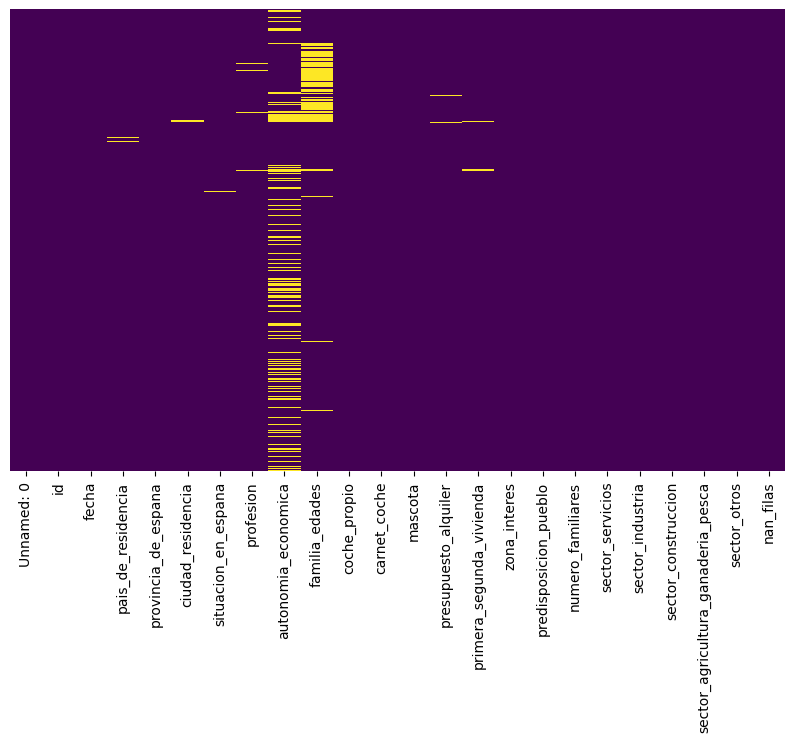

In [5]:
plt.figure(figsize=(10, 6))  

sns.heatmap(data_vis.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [6]:
data_vis.shape

(10618, 24)

In [7]:
porcentaje_nulos = data_vis.isnull().sum() / data_vis.count() * 100
porcentaje_nulos.sort_values(ascending=False)

autonomia_economica                   26.299512
familia_edades                        18.451584
profesion                              0.979553
primera_segunda_vivienda               0.587344
situacion_en_espana                    0.444613
presupuesto_alquiler                   0.387634
pais_de_residencia                     0.264400
ciudad_residencia                      0.264400
Unnamed: 0                             0.000000
predisposicion_pueblo                  0.000000
sector_otros                           0.000000
sector_agricultura_ganaderia_pesca     0.000000
sector_construccion                    0.000000
sector_industria                       0.000000
sector_servicios                       0.000000
numero_familiares                      0.000000
mascota                                0.000000
zona_interes                           0.000000
id                                     0.000000
carnet_coche                           0.000000
coche_propio                           0

In [8]:
data_vis = data_vis.drop(labels=["Unnamed: 0",
                                       'nan_filas',
                                       'familia_edades',
                                      'ciudad_residencia'],
                                        axis=1)


In [9]:
data_vis = data_vis.dropna(subset=[col for col in data_vis.columns if col != 'autonomia_economica'])

In [10]:
porcentaje_nulos = data_vis.isnull().sum() / data_vis.count() * 100
porcentaje_nulos.sort_values(ascending=False)

autonomia_economica                   25.436047
id                                     0.000000
primera_segunda_vivienda               0.000000
sector_agricultura_ganaderia_pesca     0.000000
sector_construccion                    0.000000
sector_industria                       0.000000
sector_servicios                       0.000000
numero_familiares                      0.000000
predisposicion_pueblo                  0.000000
zona_interes                           0.000000
presupuesto_alquiler                   0.000000
fecha                                  0.000000
mascota                                0.000000
carnet_coche                           0.000000
coche_propio                           0.000000
profesion                              0.000000
situacion_en_espana                    0.000000
provincia_de_espana                    0.000000
pais_de_residencia                     0.000000
sector_otros                           0.000000
dtype: float64

In [11]:
moda = data_vis.autonomia_economica.mode()[0] #hemos tomado la decisión de tomar el valor de la moda (dado que los solicitantes tienen perfiles parecidos) como método de rellenar los nulos de la columna de autonomía económica

moda #el valor que más se repite es '3' -> 3 meses de autonomía económica

'3 meses'

In [12]:
data_vis['autonomia_economica'] = data_vis['autonomia_economica'].fillna(moda)

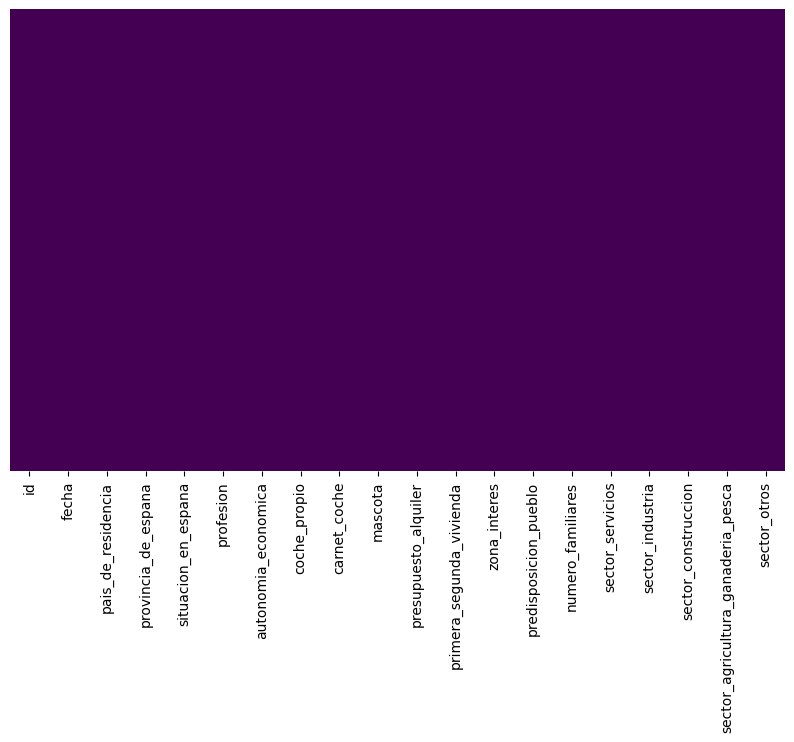

In [13]:
plt.figure(figsize=(10, 6))  

sns.heatmap(data_vis.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [14]:
data_vis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 1 to 10617
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  10356 non-null  object
 1   fecha                               10356 non-null  object
 2   pais_de_residencia                  10356 non-null  object
 3   provincia_de_espana                 10356 non-null  object
 4   situacion_en_espana                 10356 non-null  object
 5   profesion                           10356 non-null  object
 6   autonomia_economica                 10356 non-null  object
 7   coche_propio                        10356 non-null  object
 8   carnet_coche                        10356 non-null  object
 9   mascota                             10356 non-null  object
 10  presupuesto_alquiler                10356 non-null  object
 11  primera_segunda_vivienda            10356 non-null  ob

In [15]:
prov_norte = ['Galicia', 'Asturias', 'Cantabria', 'País Vasco', 'Navarra', 'La Rioja','Pontevedra','Euskadi','Vizcaya','A Coruña','Gipuzkoa''Ourense', 'Lugo','La Rioja', ]
prov_sur = ['Andalucía','Cádiz','Córdoba','Málaga','Sevilla', 'Granada', 'Almería', 'Huelva', 'Ceuta y Melilla','Canarias','Las Palmas','Santa Cruz de Tenerife']
prov_este = ['Cataluña', 'Baleares','Valencia', 'Murcia','Alicante', 'Comunitat Valenciana','Región de Murcia','Castellón','Lérida','Lleida','Girona','Tarragona', 'Barcelona']
prov_centro = ['Castilla y León', 'Castilla-La Mancha', 'Aragón', 'Toledo','Extremadura', 'Ciudad Real','Albacete','Cáceres','Guadalajara','Zaragoza','Segovia','Valladolid','León','Badajoz', 'Huesca','Cuenca', 'Jaén','Salamanca', 'Burgos','Zamora', 'Palencia','Ávila', 'Teruel','Soria']
prov_madrid = ['Madrid']
prov_fuera_espana = ['Ninguna','Plazas de Soberanía']

In [16]:
data_vis['prov_norte'] = data_vis['provincia_de_espana'].apply(lambda x: 1 if x in prov_norte else 0)
data_vis['prov_sur'] = data_vis['provincia_de_espana'].apply(lambda x: 1 if x in prov_sur else 0)
data_vis['prov_este'] = data_vis['provincia_de_espana'].apply(lambda x: 1 if x in prov_este else 0)
data_vis['prov_centro'] = data_vis['provincia_de_espana'].apply(lambda x: 1 if x in prov_centro else 0)
data_vis['prov_madrid'] = data_vis['provincia_de_espana'].apply(lambda x: 1 if x in prov_madrid else 0)
data_vis['prov_fuera_espana'] = data_vis['provincia_de_espana'].apply(lambda x: 1 if x in prov_fuera_espana else 0)

In [17]:
data_vis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 1 to 10617
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  10356 non-null  object
 1   fecha                               10356 non-null  object
 2   pais_de_residencia                  10356 non-null  object
 3   provincia_de_espana                 10356 non-null  object
 4   situacion_en_espana                 10356 non-null  object
 5   profesion                           10356 non-null  object
 6   autonomia_economica                 10356 non-null  object
 7   coche_propio                        10356 non-null  object
 8   carnet_coche                        10356 non-null  object
 9   mascota                             10356 non-null  object
 10  presupuesto_alquiler                10356 non-null  object
 11  primera_segunda_vivienda            10356 non-null  ob

In [18]:
#identificaremos los cuestionarios en cirílico para eliminarlos

mask = data_vis.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)
result = data_vis.loc[mask]

result

,id,fecha,pais_de_residencia,provincia_de_espana,situacion_en_espana,profesion,autonomia_economica,coche_propio,carnet_coche,mascota,presupuesto_alquiler,primera_segunda_vivienda,zona_interes,predisposicion_pueblo,numero_familiares,sector_servicios,sector_industria,sector_construccion,sector_agricultura_ganaderia_pesca,sector_otros,prov_norte,prov_sur,prov_este,prov_centro,prov_madrid,prov_fuera_espana
72,U-000094,2020-12-07,Latino América,Ninguna,No estoy en ninguna de esas situaciones,?????,6 meses,Si,Si,No,Hasta 300€,Primera residencia,? ?????????,1 mes,2,0,0,0,0,1,0,0,0,0,0,1
5290,U-005951,2021-11-04,Otro,Ninguna,No estoy en ninguna de esas situaciones,????,???? ?? ???,Si,Si,Si,Hasta 300€,Primera residencia,??? ????,Aún me lo estoy pensando,3,0,0,0,0,1,0,0,0,0,0,1
5847,U-006517,2022-01-01,Otro,Ninguna,No estoy en ninguna de esas situaciones,???????? ????????,3 meses,Si,Si,No,Hasta 300€,Primera residencia,? ?????????,1 mes,6,0,0,0,0,0,0,0,0,0,0,1
7198,U-007930,2022-03-28,Otro,Ninguna,Tengo nacionalidad española / de un país de la...,????????,3 meses,No,No,No,Hasta 300€,Primera residencia,"Indiferente, menos de 150km de Madrid",1 mes,7,0,0,0,0,1,0,0,0,0,0,1
9314,U-010051,2022-09-09,Otro,Ninguna,No estoy en ninguna de esas situaciones,?????? ?????????,3 meses,Si,Si,Si,Hasta 300€,Primera residencia,?????? ????????,1 mes,3,0,0,0,0,1,0,0,0,0,0,1
10256,U-010995,2022-12-26,España,????????,Tengo nacionalidad española / de un país de la...,Periodista,3 meses,Si,Si,No,Hasta 300€,Primera residencia,Indiferente,6 meses,2,0,0,0,0,0,0,0,0,0,0,0
10599,U-011338,2023-02-24,Otro,Ninguna,Tengo nacionalidad española / de un país de la...,??????,3 meses,Si,Si,Si,Hasta 300€,Primera residencia,Indiferente,Aún me lo estoy pensando,5,0,0,0,0,1,0,0,0,0,0,1


In [19]:
data_vis = data_vis.drop(result.index)

In [20]:
data_vis.to_csv('../Proyecto_Arraigo_Recomender_System/data/data_visualizacion.csv')